In [1]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import optimizers
from keras import losses 
from keras import metrics

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index(path='/Users/sunshuai/.keras/datasets/imdb_word_index.json') 
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) 
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) 
model.add(layers.Dense(16, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [11]:
# model.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizers.RMSprop(lr=0.001), 
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000] 
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))
history_dict = history.history
print(history_dict.keys())

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5418 - binary_accuracy: 0.7843 - val_loss: 0.4209 - val_binary_accuracy: 0.8623
Epoch 2/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.3383 - binary_accuracy: 0.8985 - val_loss: 0.3319 - val_binary_accuracy: 0.8769
Epoch 3/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.2483 - binary_accuracy: 0.9231 - val_loss: 0.2870 - val_binary_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1958 - binary_accuracy: 0.9362 - val_loss: 0.2735 - val_binary_accuracy: 0.8920
Epoch 5/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.1574 - binary_accuracy: 0.9512 - val_loss: 0.2821 - val_binary_accuracy: 0.8851
Epoch 6/20
15000/15000 [==============================] - 1s 79us/step - loss: 0.1310 - binary_accuracy: 0.9598 - val_loss: 0.2886 - val_binary_

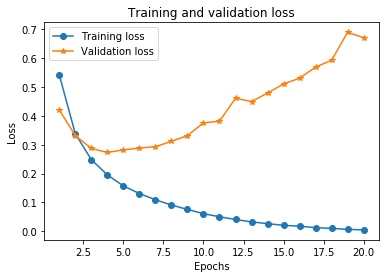

In [14]:
history_dict = history.history 
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, '-o', label='Training loss') 
plt.plot(epochs, val_loss_values, '-*', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

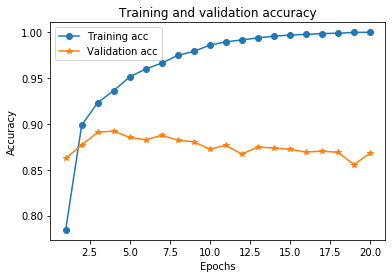

In [15]:
plt.clf()
acc = history_dict['binary_accuracy'] 
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, '-o', label='Training acc') 
plt.plot(epochs, val_acc, '-*', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 4s 143us/step
[0.7263055624175072, 0.8513200283050537]
